In [117]:
#Load data
import numpy as np
import xlrd

# Load xls sheet with data

doc = xlrd.open_workbook('../SAheart.xlsx').sheet_by_index(0)
    
# Extract attribute names (1st row, column 2 to 9)
attributeNames = doc.row_values(0, 1, 10)
print(attributeNames)

# Extract class names to python list,
# then encode with integers (dict)
classLabels = doc.col_values(10, 1, 463)
classNames = sorted(set(classLabels))
classDict = dict(zip(classNames, range(len(classNames))))

famHist = doc.col_values(5, 1, 463)
famHistDict = dict(zip(famHist, range(len(set(famHist)))))

#doc.col_values(5,1,463) = [famHistDict[value] for value in famHist]
# Extract vector y, convert to NumPy matrix and transpose
y = np.mat([classDict[value] for value in classLabels]).T

# Preallocate memory, then extract excel data to matrix X
X = np.mat(np.empty((462, 9)))

for i, col_id in enumerate(range(1, 10)):
    if i == 4:
        X[:, i] = np.mat([famHistDict[value] for value in famHist]).T
    else:
        X[:, i] = np.mat(doc.col_values(col_id, 1, 463)).T

# Compute values of N, M and C.
N = len(y)
M = len(attributeNames)
C = len(classNames)

print(N,M,C)

['sbp', 'tobacco', 'ldl', 'adiposity', 'famhist', 'typea', 'obesity', 'alcohol', 'age']
462 9 2


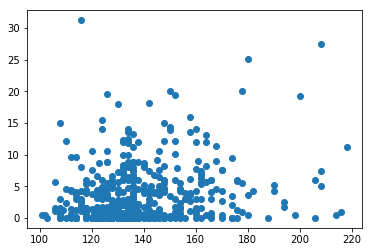

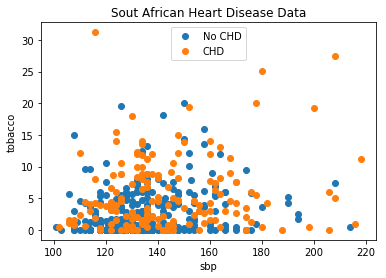

In [94]:
from matplotlib.pyplot import figure, plot, title, legend, xlabel, ylabel, show, clf, subplot
clf()
# Data attributes to be plotted
i = 0
j = 1

# Make a simple plot of the i'th attribute against the j'th attribute
# Notice that X is of matrix type (but it will also work with a numpy array)
# X = np.array(X) #Try to uncomment this line
plot(X[:, i], X[:, j], 'o')

# %%
# Make another more fancy plot that includes legend, class labels, 
# attribute names, and a title.
f = figure()
#f.hold()
title('South African Heart Disease Data')

for c in range(C):
    # select indices belonging to class c:
    class_mask = y.A.ravel()==c
    plot(X[class_mask,i], X[class_mask,j], 'o')

translated_classNames = ["No CHD", "CHD"]
legend(translated_classNames)
xlabel(attributeNames[i])
ylabel(attributeNames[j])

# Output result to screen
show()


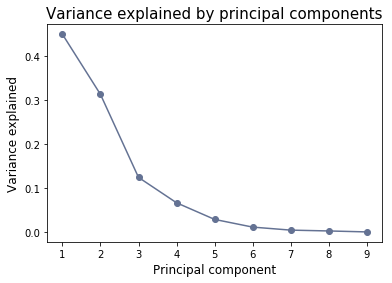

In [95]:
# exercise 2.1.3
# (requires data structures from ex. 2.2.1)
#from ex2_1_1 import *

from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, savefig
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=True)

# Compute variance explained by principal components
rho = (S*S) / (S*S).sum() 

# Plot variance explained
figure()
plot(range(1,len(rho)+1),rho,'o-', color="#647293")
title('Variance explained by principal components', fontsize=15);
xlabel('Principal component', fontsize=12);
ylabel('Variance explained', fontsize=12);
savefig("variance_explained.png")
show()


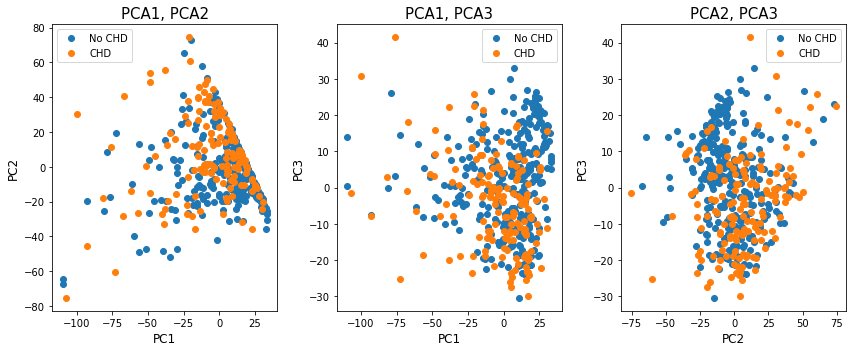

In [100]:
from matplotlib.pyplot import figure, plot, title, xlabel, ylabel, show, legend, subplots, subplot, tight_layout
from scipy.linalg import svd

# Subtract mean value from data
Y = X - np.ones((N,1))*X.mean(0)

# PCA by computing SVD of Y
U,S,V = svd(Y,full_matrices=False)
V = V.T
# Project the centered data onto principal component space
Z = Y * V


# Indices of the principal components to be plotted


# Plot PCA of the data
subplots(1,3, figsize=(12,5))
subplot(1,3,1)
i = 0
j = 1
title('PCA1, PCA2', fontsize=15)
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y.A.ravel()==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o')
legend(translated_classNames)
xlabel('PC{0}'.format(i+1), fontsize=12)
ylabel('PC{0}'.format(j+1), fontsize=12)

subplot(1,3,2)
i = 0
j = 2
title('PCA1, PCA3', fontsize=15)
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y.A.ravel()==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o')
legend(translated_classNames)
xlabel('PC{0}'.format(i+1), fontsize=12)
ylabel('PC{0}'.format(j+1), fontsize=12)

subplot(1,3,3)
i = 1
j = 2
title('PCA2, PCA3', fontsize=15)
#Z = array(Z)
for c in range(C):
    # select indices belonging to class c:
    class_mask = y.A.ravel()==c
    plot(Z[class_mask,i], Z[class_mask,j], 'o')
legend(translated_classNames)
xlabel('PC{0}'.format(i+1), fontsize=12)
ylabel('PC{0}'.format(j+1), fontsize=12)
# Output result to screen
tight_layout()
savefig("PCA_projection.png")
show()

In [5]:
import pandas as pd
pcas = [[1],[2],[3]]
for i in range(3):
    V[:]
pca_df = pd.DataFrame(V[:3], columns=attributeNames)

pca_df.index+=1
pca_df

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age
1,-0.414583,0.773840,0.477330,-0.003626,0.037536,-0.004177,0.002855,-0.000525,-0.000495
2,-0.056834,0.041824,-0.115293,0.022954,0.089345,0.986222,-0.013337,0.019684,-0.004483
3,-0.006418,0.024449,-0.039320,0.026168,-0.088687,0.022253,0.068668,-0.991708,0.023883


In [6]:
# exercise 2.1.5
#from ex2_1_1 import *
from scipy.linalg import svd

# (requires data structures from ex. 2.2.1 and 2.2.3)
Y = X - np.ones((N,1))*X.mean(0)
U,S,V = svd(Y,full_matrices=False)
V=V.T

#print(V)

#print(V[:,1].T)
## Projection of water class onto the 2nd principal component.
# Note Y is a numpy matrix, while V is a numpy array. 

# Either convert V to a numpy.mat and use * (matrix multiplication)
#print((Y[y.A.ravel()==4,:] * np.mat(V[:,1]).T).T)

# Or interpret Y as a numpy.array and use @ (matrix multiplication for np.array)
#print( (np.asarray(Y[y.A.ravel()==0,:]) @ V[:,1]).T )

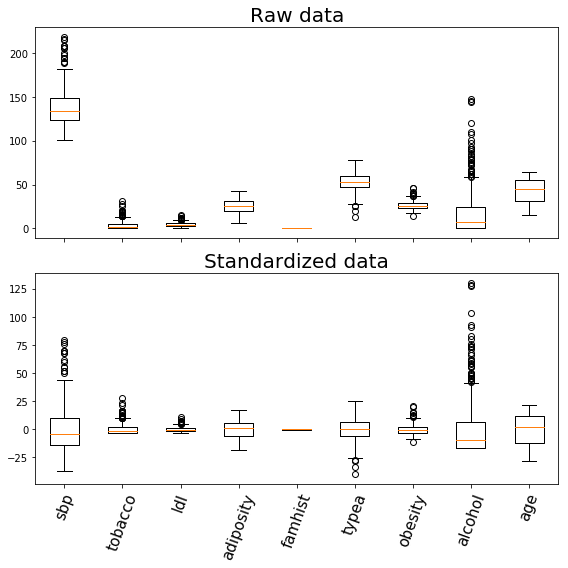

In [59]:
import matplotlib.pyplot as plt
#Visualize the 8 attributes
plt.clf()
#f, ax = plt.subplots(3,3, figsize=(30,30))
#print(type(ax))
#plot_count = 0
#for i in range(3):
#    for j in range(3):
#        ax[i,j].set_title(attributeNames[plot_count])
#        ax[i,j].boxplot(X[:,plot_count])
#        plot_count+=1


f, (ax1, ax2) = plt.subplots(2,1,sharex=True, figsize=(8,8))
data = []
for i in range(len(attributeNames)):
    data.append(X[:,i])
ax1.set_title("Raw data", fontsize=20)
ax1.boxplot(data)
#ax1.xticks(range(1,len(attributeNames)+1),attributeNames, rotation=70)
    
data = []
for i in range(len(attributeNames)):
    data.append(Y[:,i])
ax2.set_title("Standardized data", fontsize=20)
ax2.boxplot(data)
plt.xticks(range(1,len(attributeNames)+1),attributeNames, rotation=70, fontsize=15)
plt.tight_layout()
plt.savefig("boxplots.png")
plt.show()


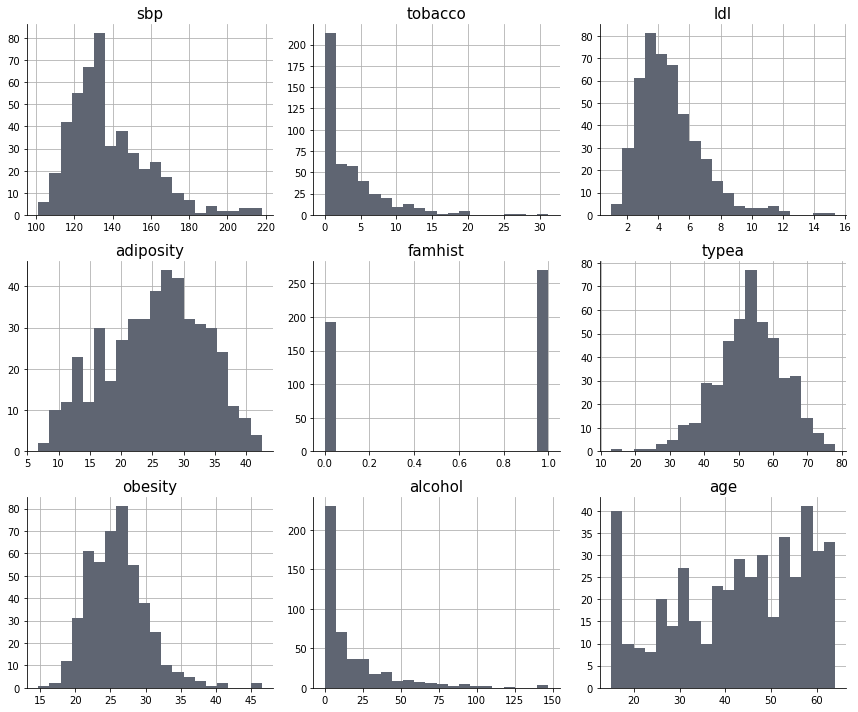

In [22]:
#Plot barplots to see distribution of each attribute
plt.clf()
figure(figsize=(12,10))


for i in range(1,len(attributeNames)+1):
    plt.grid(True, zorder=0)
    ax = plt.subplot(3,3,i)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_title(attributeNames[i-1], fontsize=15)
    ax.hist(X[:,i-1],bins=20,zorder=2, color="#5F6572")
    
plt.grid(True, zorder=0)
plt.tight_layout()
plt.savefig("histograms.png")
show()

In [10]:
#See if any of the attributes are correlated
import matplotlib.pyplot as plt
import itertools
plt.clf()
i = 1
plt.figure(figsize=(12,10))


for comb in itertools.combinations(range(len(attributeNames)), 2):
    if "famhist" in [attributeNames[comb[0]],attributeNames[comb[1]]]:
        continue
    x = X[:,comb[0]]
    y = X[:,comb[1]]
    plt.subplot(7,4,i)
    plt.scatter(x,y)
    plt.xlabel(attributeNames[comb[0]])
    plt.ylabel(attributeNames[comb[1]])
    i+=1
    
plt.tight_layout()
#plt.show()

print(type(X))


<class 'numpy.matrixlib.defmatrix.matrix'>


In [118]:
newX = X
newX = np.delete(newX, 4,1 )
M=8
attributeNames = attributeNames[:4]+attributeNames[5:]

pd.DataFrame(np.corrcoef(newX[:,0].T,newX[:,1].T))

,0,1
0,1.000000,0.212247
1,0.212247,1.000000


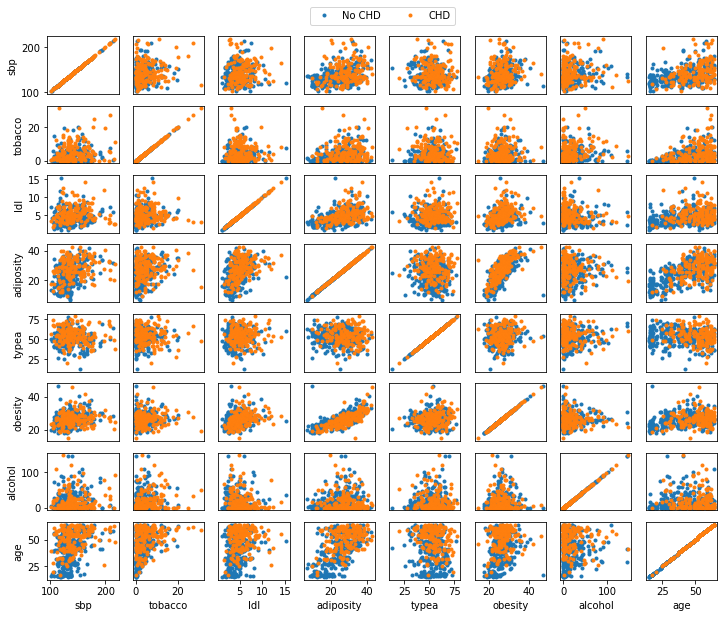

In [157]:
import matplotlib.pyplot as plt


# requires data from exercise 4.1.1
#from ex4_1_1 import *

plt.figure(figsize=(12,10))
cm = np.array([classDict[value] for value in classLabels])

corr_coeff = {}
for m1 in range(M):
    corr_coeff[m1] = []
    for m2 in range(M):
        plt.subplot(M, M, m1*M + m2 + 1)
        corr_coeff[m1].append(np.corrcoef(newX[:,m1].T,newX[:,m2].T)[1,0])
        for c in range(C):
            
            class_mask = (cm==c)
            
            plt.plot(np.array(newX[class_mask,m2]), np.array(newX[class_mask,m1]), '.')
            if m1==M-1:
                plt.xlabel(attributeNames[m2])
            else:
                plt.xticks([])
            if m2==0:
                plt.ylabel(attributeNames[m1])
            else:
                plt.yticks([])
            #ylim(0,X.max()*1.1)
            #xlim(0,X.max()*1.1)

plt.legend(translated_classNames, loc='upper center', bbox_to_anchor=(-3.7, 10), ncol=5)
#plt.legend(classNames)

plt.savefig("correlation.png")
show()


In [163]:
df = pd.DataFrame(corr_coeff)
df.columns = attributeNames
df.index=attributeNames
df

,sbp,tobacco,ldl,adiposity,typea,obesity,alcohol,age
sbp,1.000000,0.212247,0.158296,0.356500,-0.057454,0.238067,0.140096,0.388771
tobacco,0.212247,1.000000,0.158905,0.286640,-0.014608,0.124529,0.200813,0.450330
ldl,0.158296,0.158905,1.000000,0.440432,0.044048,0.330506,-0.033403,0.311799
adiposity,0.356500,0.286640,0.440432,1.000000,-0.043144,0.716556,0.100330,0.625954
typea,-0.057454,-0.014608,0.044048,-0.043144,1.000000,0.074006,0.039498,-0.102606
obesity,0.238067,0.124529,0.330506,0.716556,0.074006,1.000000,0.051620,0.291777
alcohol,0.140096,0.200813,-0.033403,0.100330,0.039498,0.051620,1.000000,0.101125
age,0.388771,0.450330,0.311799,0.625954,-0.102606,0.291777,0.101125,1.000000
